 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [348]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [349]:
# Reading whale returns
whale_returns = pd.read_csv('Resources/whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv('Resources/algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_returns = pd.read_csv('Resources/sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


C:\Users\ander\AppData\Local\Temp\ipykernel_20356\344011096.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv('Resources/whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
C:\Users\ander\AppData\Local\Temp\ipykernel_20356\344011096.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv('Resources/algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
C:\Users\ander\AppData\Local\Temp\ipykernel_20356\344011096.py:4: FutureWarning: The argum

In [350]:
# Count nulls
whale_returns.isnull().sum()
algo_returns.isnull().sum()
sp500_returns.isnull().sum()


Close    0
dtype: int64

In [351]:
# Drop nulls
whale_returns.dropna(inplace=True)
algo_returns.dropna(inplace=True)
sp500_returns.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [352]:
# Reading algorithmic returns
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [353]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [354]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [355]:
# Reading S&P 500 Closing Prices
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [356]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [357]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '').astype(float)



In [358]:
# Calculate Daily Returns
sp500_returns['Daily Returns'] = sp500_returns['Close'].pct_change()




In [359]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [360]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close':'S&P 500'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [361]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Daily Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

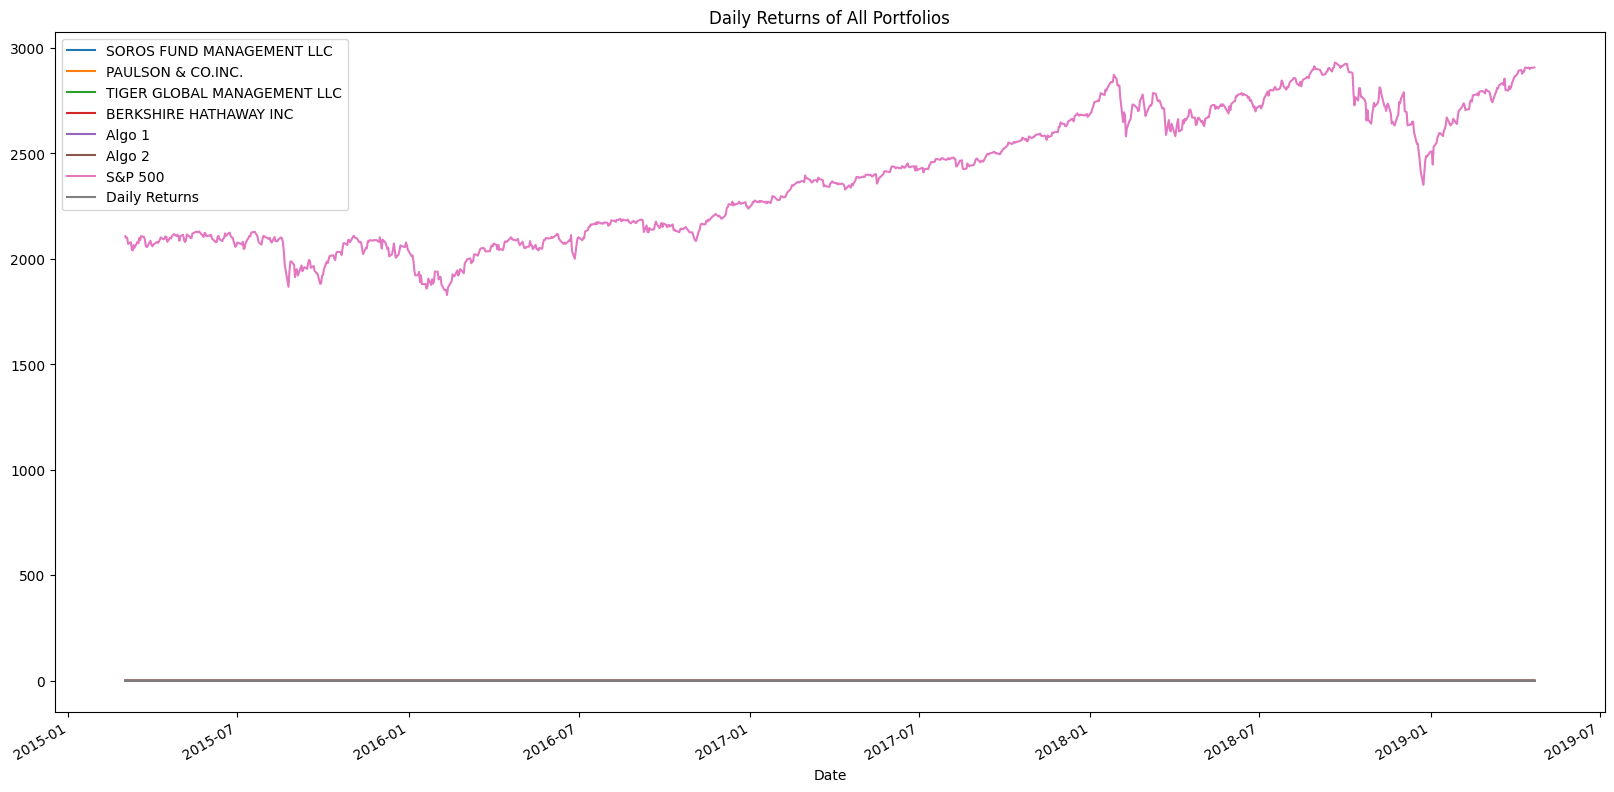

In [362]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10), title='Daily Returns of All Portfolios')

#### Calculate and Plot cumulative returns.

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

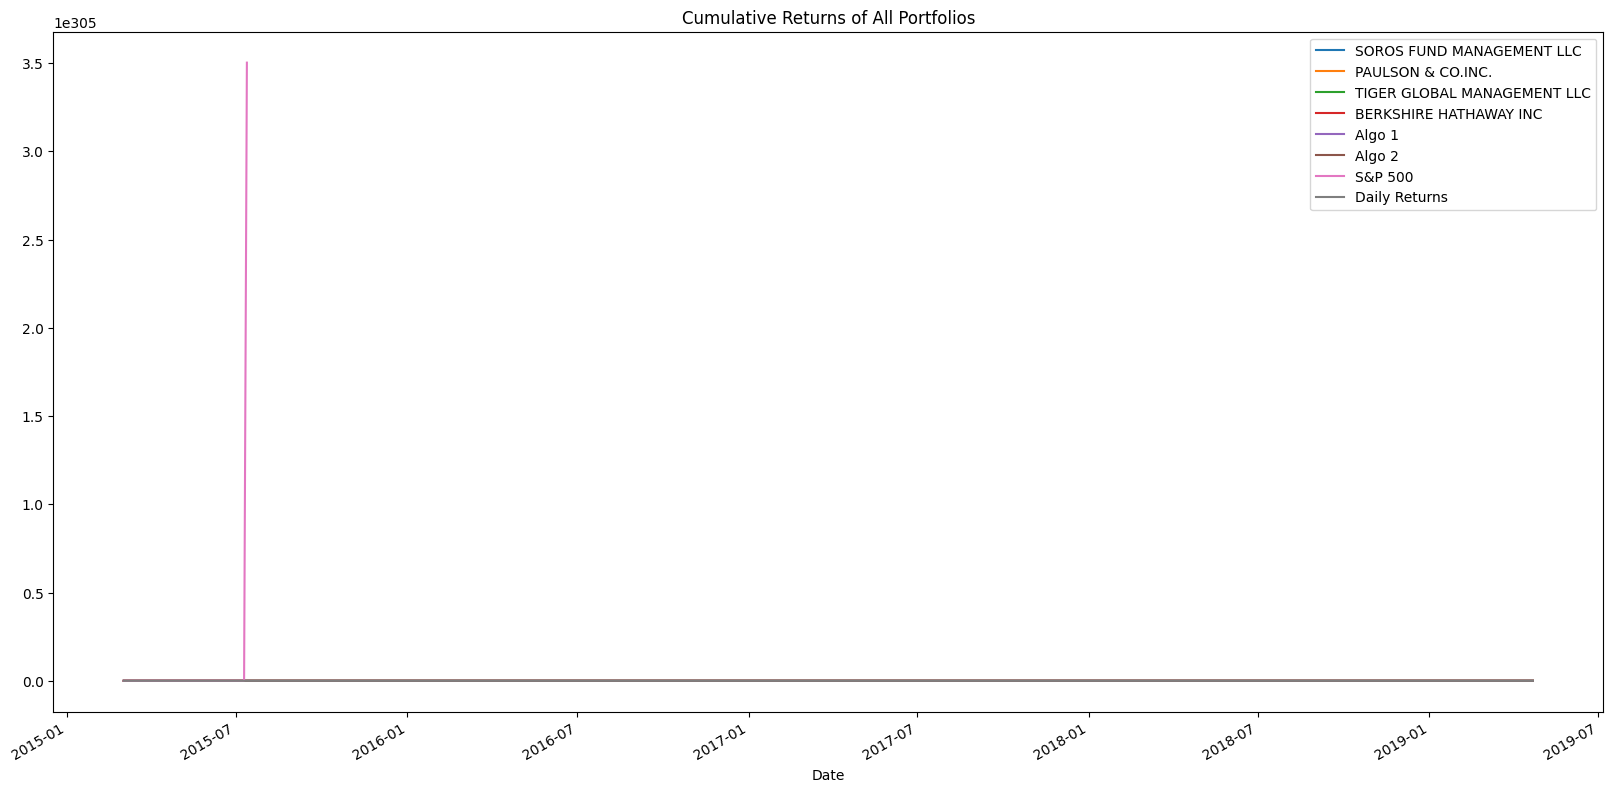

In [363]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of All Portfolios')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Box Plot of All Portfolios'}>

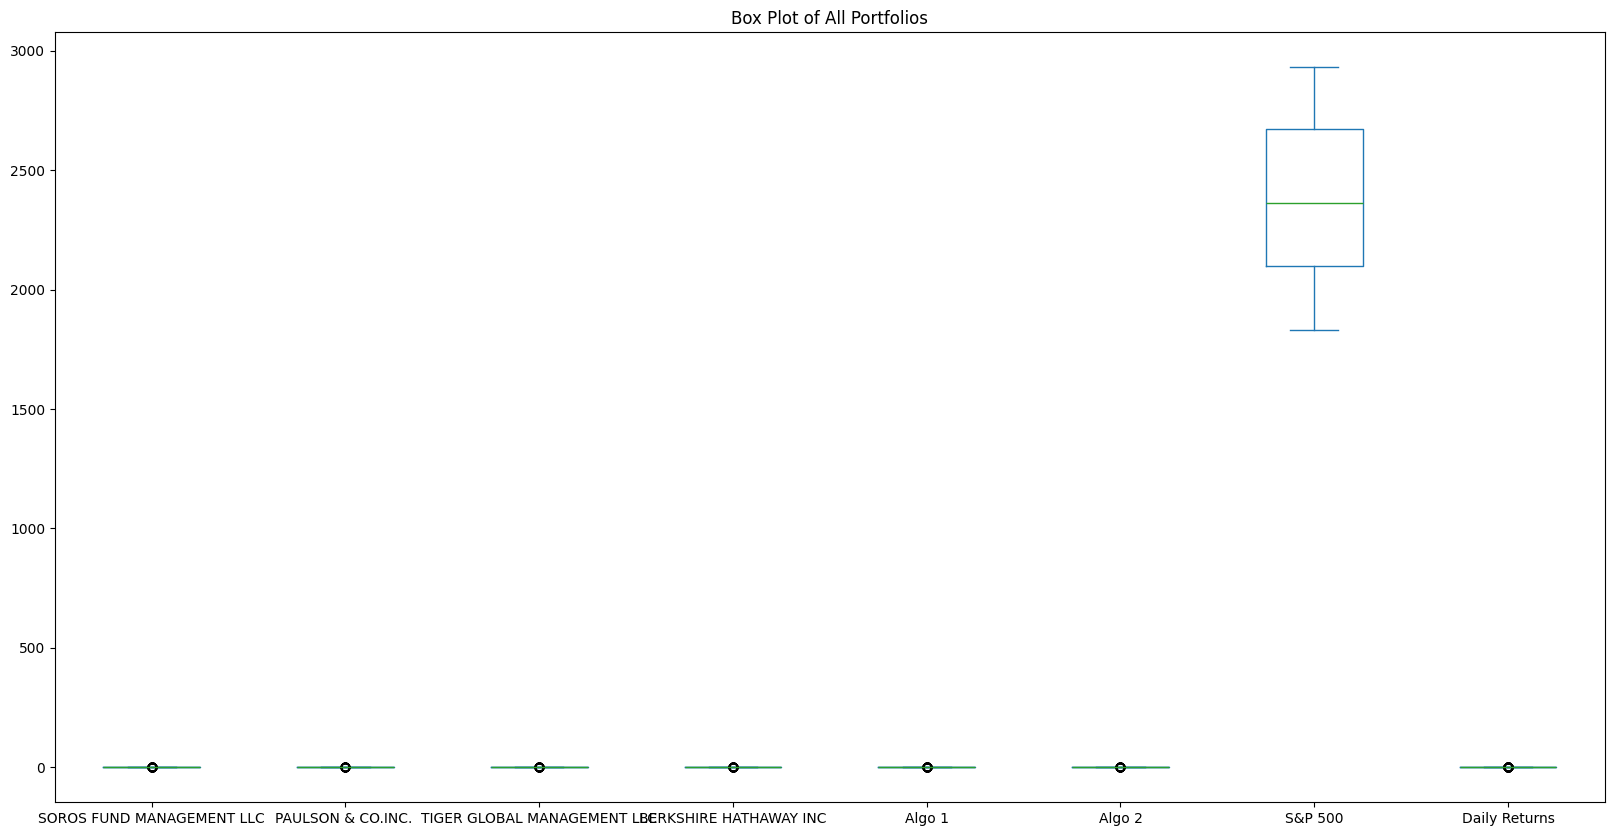

In [364]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title='Box Plot of All Portfolios')

### Calculate Standard Deviations

In [365]:
# Calculate the daily standard deviations of all portfolios
combined_returns.std()


SOROS FUND MANAGEMENT LLC        0.007896
PAULSON & CO.INC.                0.007026
TIGER GLOBAL MANAGEMENT LLC      0.010897
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007623
Algo 2                           0.008341
S&P 500                        305.515204
Daily Returns                    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [366]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500

sp500_std = combined_returns['S&P 500'].std()
combined_returns2 = combined_returns.drop(columns=['S&P 500'])

riskier_portfolios = combined_returns2.std() > sp500_std

print(riskier_portfolios)




SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
Daily Returns                  False
dtype: bool


### Calculate the Annualized Standard Deviation

In [367]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC         0.125348
PAULSON & CO.INC.                 0.111527
TIGER GLOBAL MANAGEMENT LLC       0.172989
BERKSHIRE HATHAWAY INC            0.205079
Algo 1                            0.121006
Algo 2                            0.132413
S&P 500                        4849.903507
Daily Returns                     0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

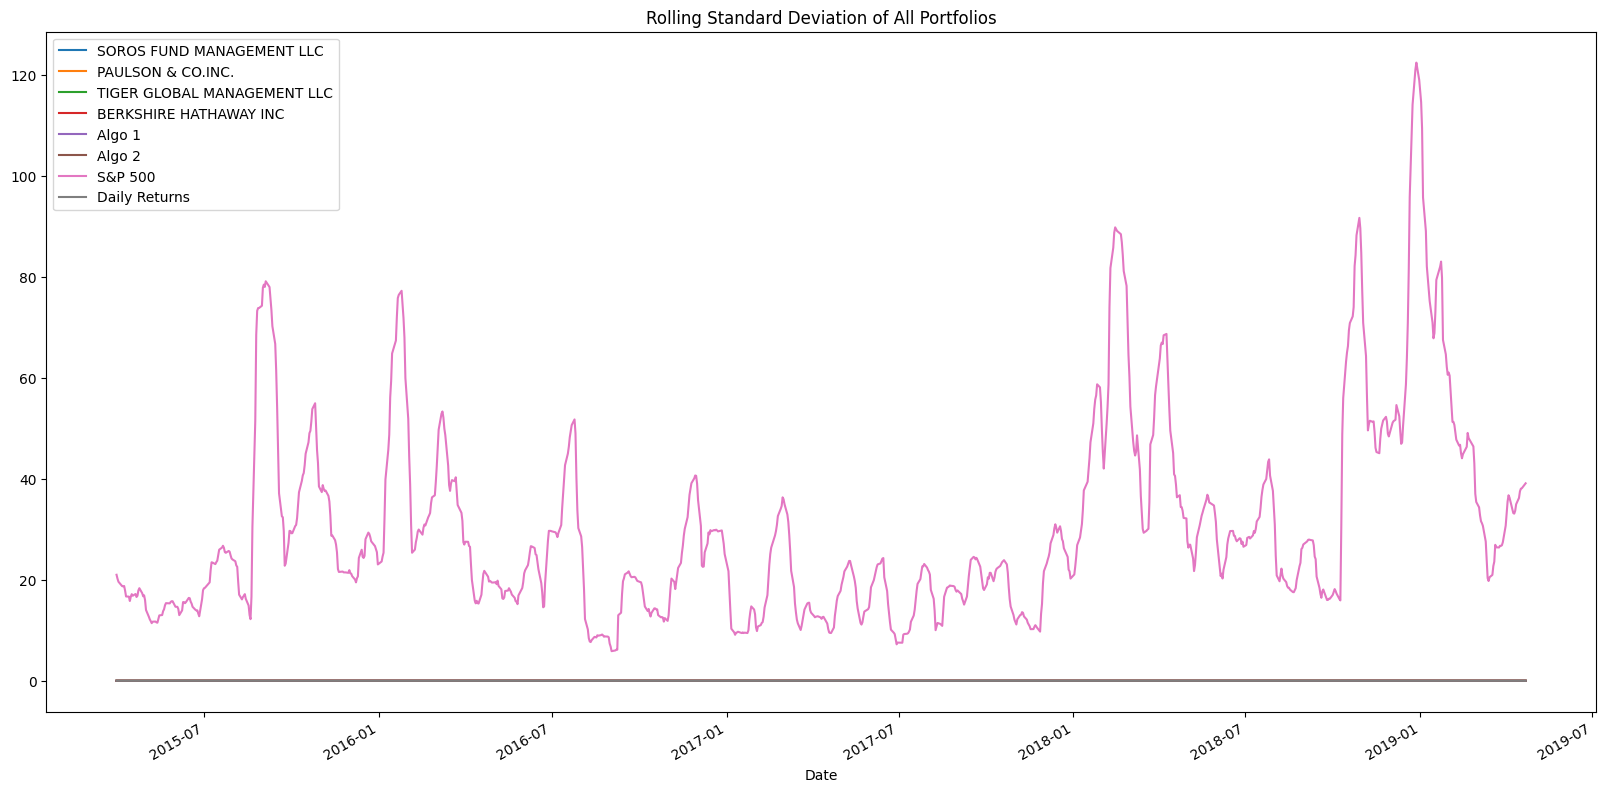

In [368]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of All Portfolios')


### Calculate and plot the correlation

<Axes: >

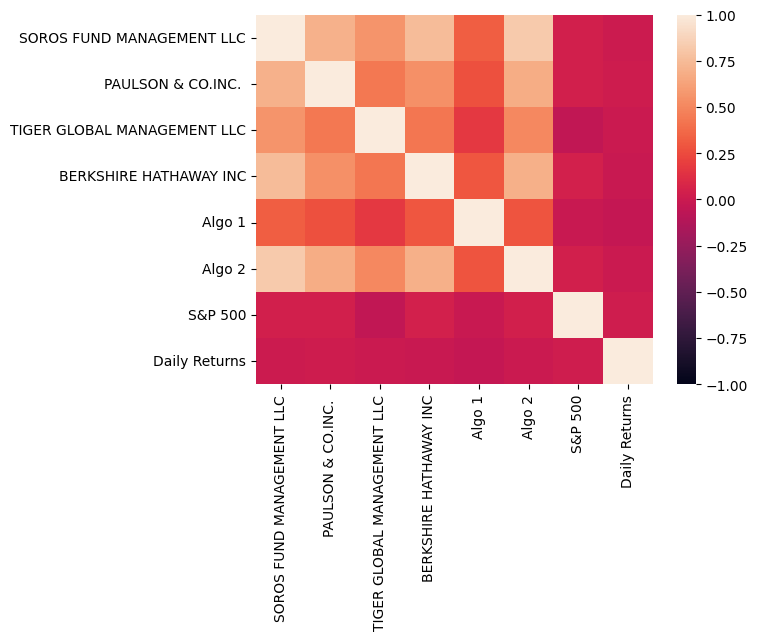

In [369]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

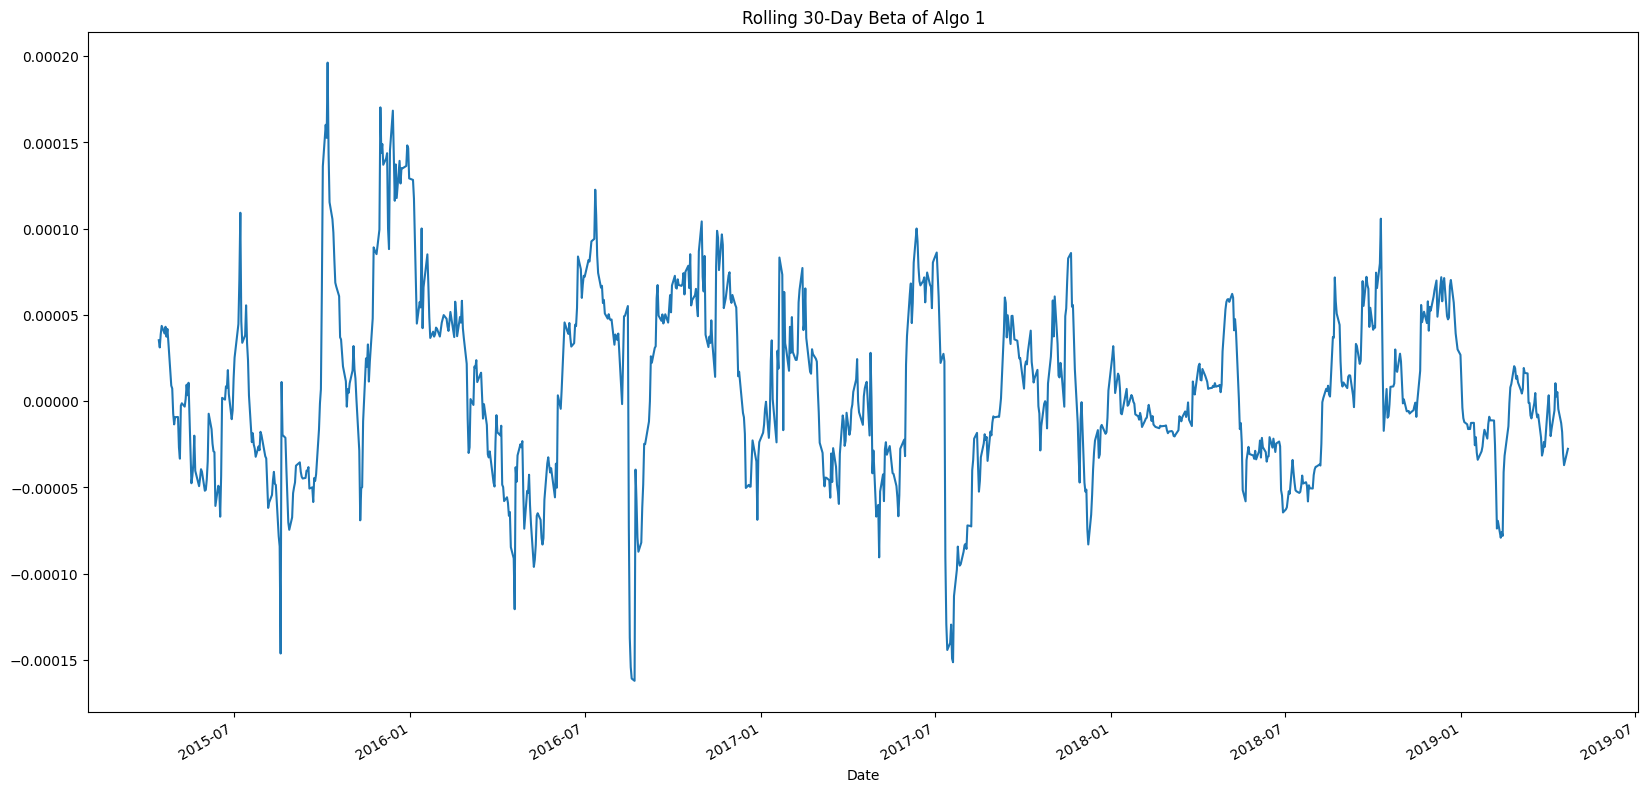

In [370]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])
# Calculate variance of S&P 500
sp500_variance = combined_returns['S&P 500'].var()

# Computing beta
algo_1_beta = algo_1_covariance / sp500_variance

# Plot beta trend
rolling_covariance = combined_returns['Algo 1'].rolling(window=30).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average of All Portfolios'}, xlabel='Date'>

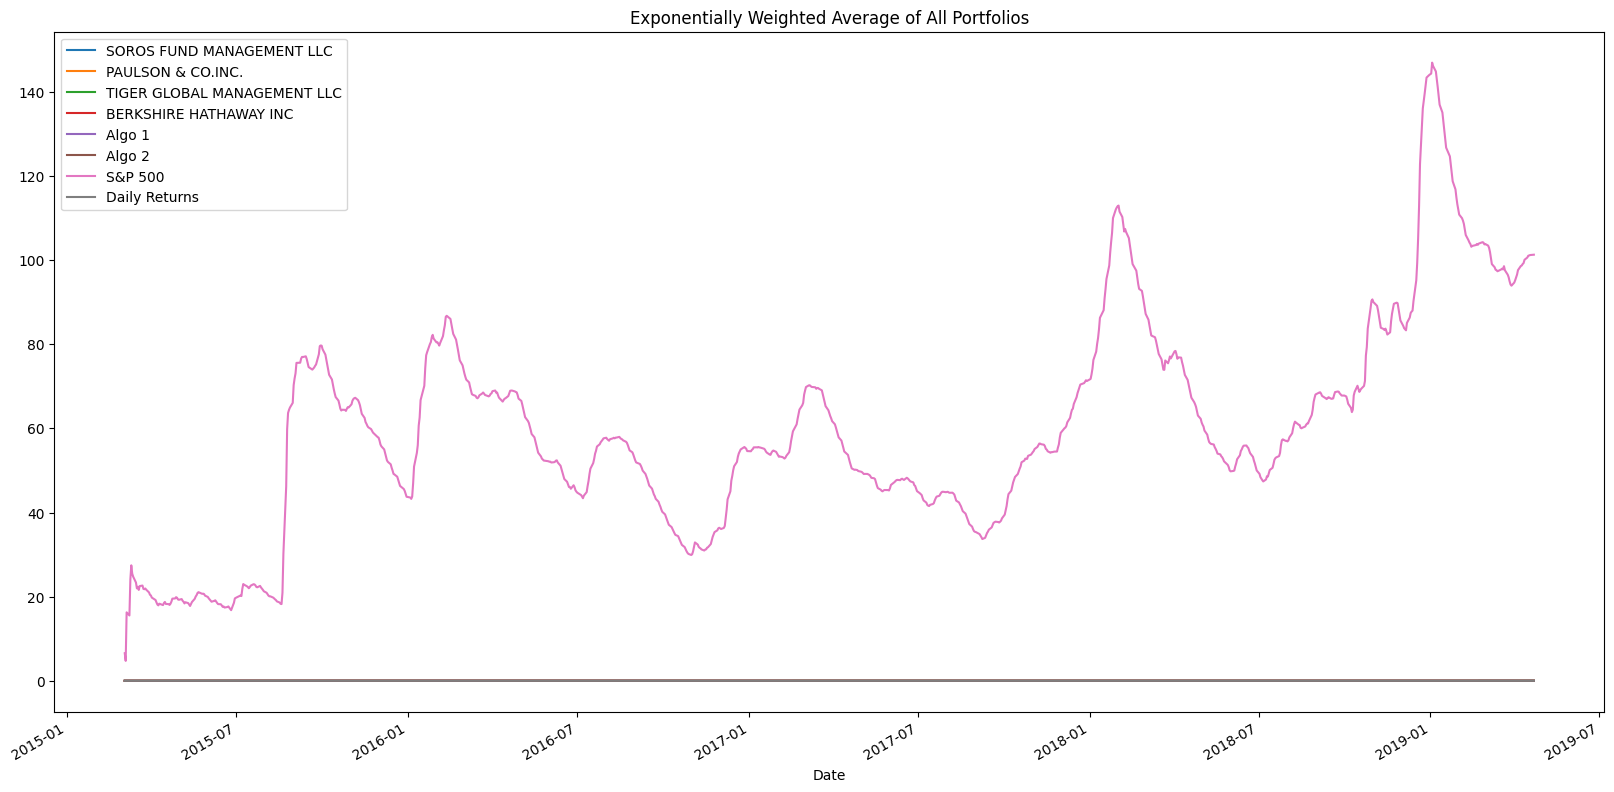

In [371]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10), title='Exponentially Weighted Average of All Portfolios')



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [372]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))


<Axes: title={'center': 'Sharpe Ratios'}>

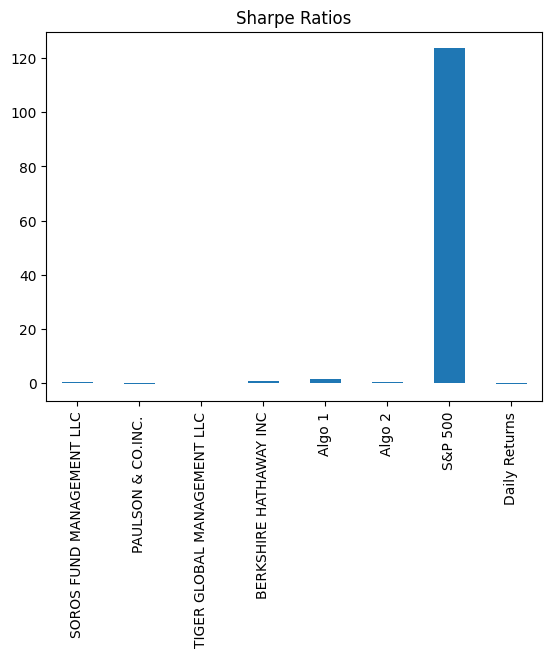

In [373]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 has a higher sharpe ratio compared to both the SP500 and the whale portfolios, providing a better risk-adjusted return. This means that for the level of risk it's taking, Algo 1 is yielding higher excess returns over the risk-free rate than the other portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [374]:
# Reading data from 1st stock
tesla_historical = pd.read_csv('Resources/tsla_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

C:\Users\ander\AppData\Local\Temp\ipykernel_20356\2149831115.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tesla_historical = pd.read_csv('Resources/tsla_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [375]:
# Reading data from 2nd stock
xpeng_historical = pd.read_csv('Resources/xpeng_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

C:\Users\ander\AppData\Local\Temp\ipykernel_20356\3650540180.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  xpeng_historical = pd.read_csv('Resources/xpeng_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [376]:
# Reading data from 3rd stock
nio_historical = pd.read_csv('Resources/nio_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


C:\Users\ander\AppData\Local\Temp\ipykernel_20356\3186558157.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nio_historical = pd.read_csv('Resources/nio_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [377]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([tesla_historical, xpeng_historical, nio_historical], axis='columns', join='inner')


In [378]:
# Reset Date index
combined_df.reset_index(inplace=True)




In [379]:
# Reorganize portfolio data by having a column per symbol
combined_df.drop(columns=['Date'], inplace=True)




In [381]:
# Calculate daily returns
daily_returns = combined_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.columns = ['TSLA', 'XPEV', 'NIO']
daily_returns.head(10)


,TSLA,XPEV,NIO
1,0.039362,0.061876,0.004160
2,0.047281,0.046053,0.002486
3,0.037815,-0.007188,-0.011570
4,0.009083,-0.049774,-0.064381
5,0.025161,-0.004762,-0.023235
6,0.010526,-0.010526,-0.000915
7,0.022763,-0.048356,-0.024725
8,0.029957,-0.009146,-0.016901
9,-0.050309,-0.047179,-0.015282
10,-0.011428,0.018299,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [383]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns_df = pd.DataFrame(portfolio_returns,  columns=["My Portfolio"])

# Display sample data
portfolio_returns_df.head()
   

,My Portfolio
1,0.035133
2,0.031940
3,0.006352
4,-0.035024
5,-0.000945


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [384]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = combined_returns.join(portfolio_returns_df)

combined_portfolio_returns.head()
# not sure why its NaN for my Portoflio. Mismatch in dates?
# add date as index collumn in my portfoli

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Daily Returns,My Portfolio
Date,,,,,,,,,
2015-03-03 00:00:00,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,0.004408,NaN
2015-03-04 00:00:00,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195,NaN
2015-03-05 00:00:00,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378,NaN
2015-03-06 00:00:00,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929,NaN
2015-03-09 00:00:00,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254,NaN


In [385]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.dropna(inplace=True)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [386]:
# Calculate the annualized `std`
combined_portfolio_returns.std() * np.sqrt(252)


SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
Daily Returns                 NaN
My Portfolio                  NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

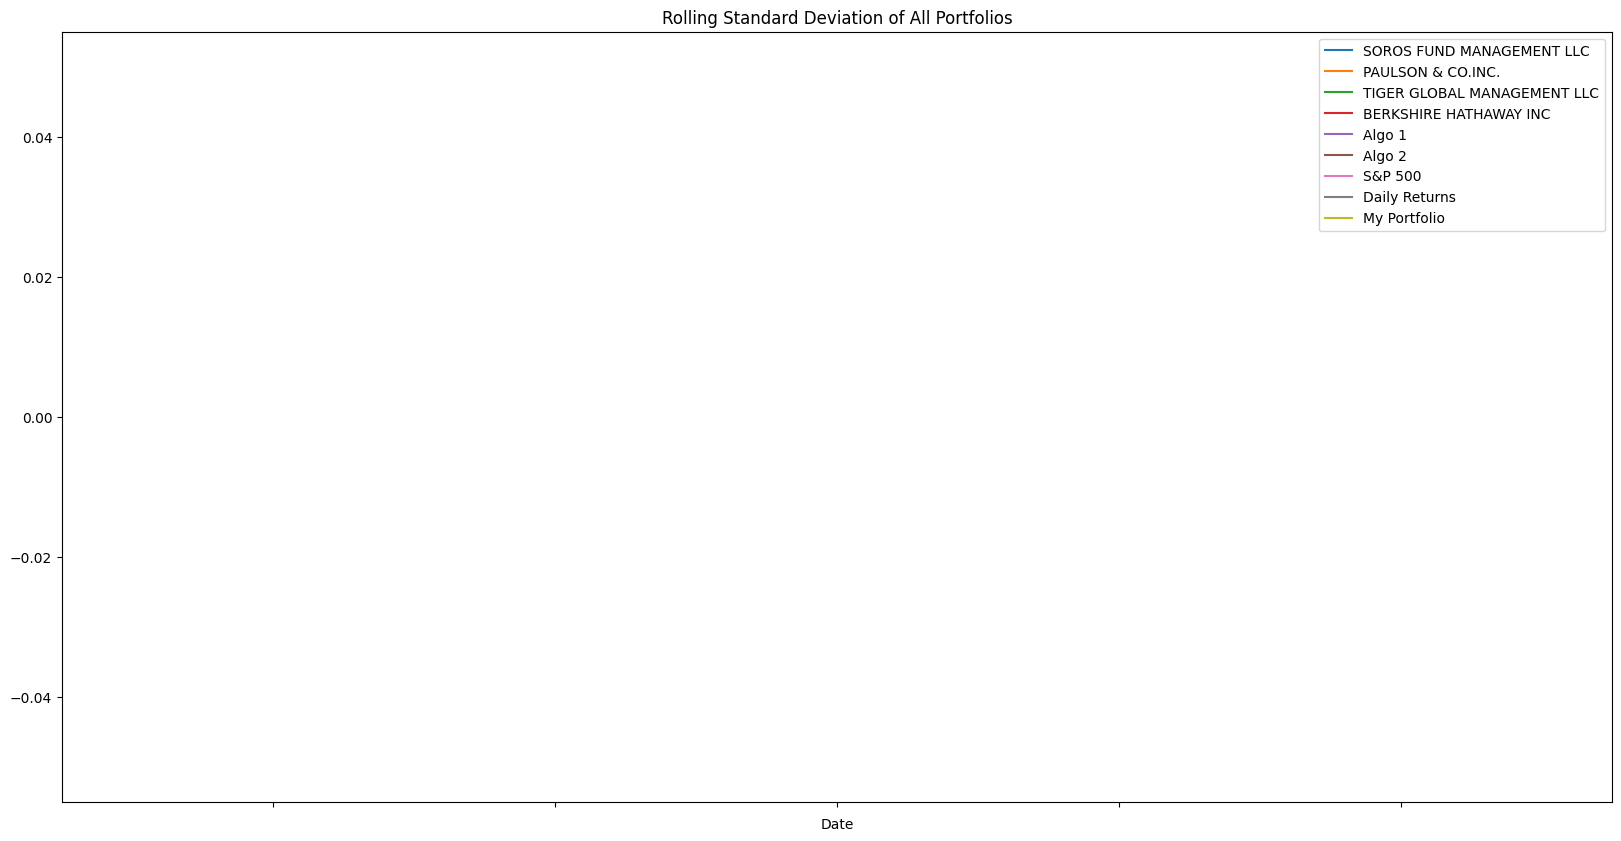

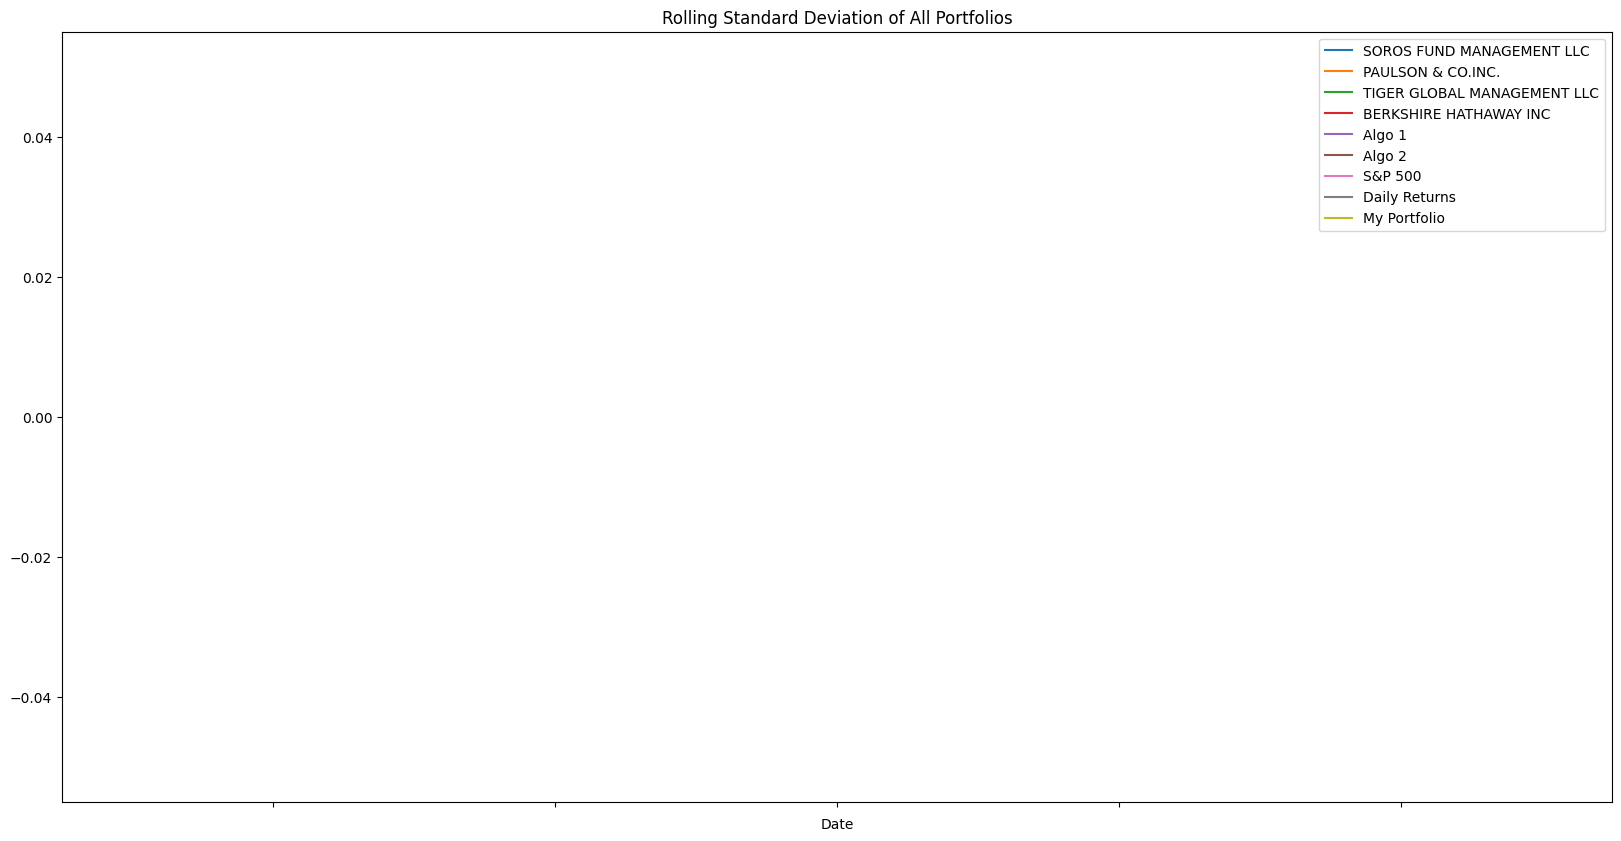

In [388]:
# Calculate rolling standard deviation
combined_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of All Portfolios')

# Plot rolling standard deviation
combined_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of All Portfolios')


### Calculate and plot the correlation

In [393]:
# Calculate and plot the correlation
correlation = combined_portfolio_returns.corr()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [392]:
# Calculate and plot Beta
covariance = combined_portfolio_returns['My Portfolio'].cov(combined_portfolio_returns['S&P 500'])
variance = combined_portfolio_returns['S&P 500'].var()
beta = covariance / variance
beta



nan

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [391]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolio_returns.mean() * 252) / (combined_portfolio_returns.std() * np.sqrt(252))



<Axes: title={'center': 'Sharpe Ratios'}>

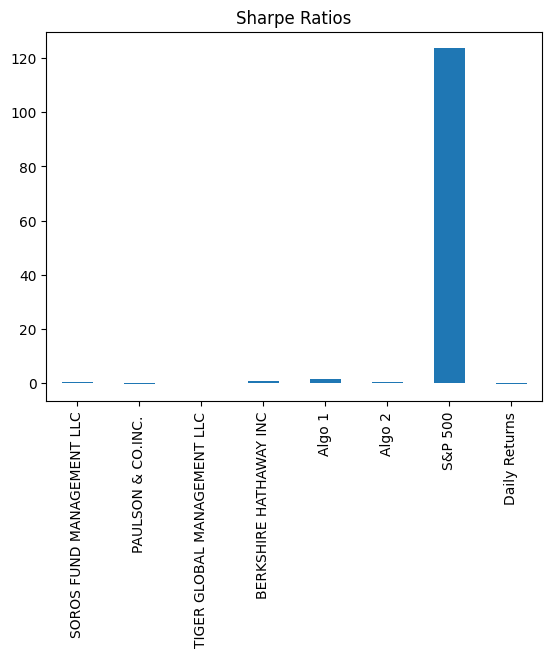

In [390]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')



### How does your portfolio do?

Write your answer here!